In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [13]:
train_df = pd.read_csv("Training_Data.csv")
train_df

,roc,ey,label
0,10.21,-535.242291,0
1,1.09,0.031664,1
2,1.19,-0.039362,0
3,-4.66,-0.040261,0
4,-78.40,-0.054407,0
...,...,...,...
1051,2.51,0.207497,0
1052,3.37,0.023578,0
1053,2.12,0.051463,0
1054,1.24,0.020633,0


In [14]:
test_df = pd.read_csv("Test_Data.csv")
test_df

,roc,ey,label
0,14.85,0.013030,0
1,1.50,0.126397,0
2,1.83,0.025256,1
3,0.40,0.017010,0
4,2.65,0.019427,1
...,...,...,...
260,6.45,0.163412,0
261,3.72,0.041994,0
262,15.96,0.087124,0
263,7.70,0.768085,0


In [46]:
# Split data
X_train = train_df.drop(['label'], axis=1)
X_train = np.array(X_train)
y_train = train_df['label']
X_test = test_df.drop(['label'], axis=1)
X_test = np.array(X_test)
y_test = test_df['label']

In [47]:
# Build model
model = Sequential()
model.add(Dense(10, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                30        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [49]:
es = EarlyStopping(monitor='val_accuracy', 
                   mode='max', # Don't minimize accuracy!
                   patience=20,
                   restore_best_weights=True)

In [50]:
# Fit model
history = model.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=100,
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Epoch 1/100
85/85 [==============================] - 1s 5ms/step - loss: 1.4750 - accuracy: 0.5083 - val_loss: 1.5570 - val_accuracy: 0.5142
Epoch 2/100
85/85 [==============================] - 0s 2ms/step - loss: 0.8305 - accuracy: 0.5889 - val_loss: 0.7470 - val_accuracy: 0.7123
Epoch 3/100
85/85 [==============================] - 0s 2ms/step - loss: 0.6168 - accuracy: 0.7156 - val_loss: 0.5991 - val_accuracy: 0.7311
Epoch 4/100
85/85 [==============================] - 0s 2ms/step - loss: 0.6097 - accuracy: 0.7145 - val_loss: 0.5923 - val_accuracy: 0.7311
Epoch 5/100
85/85 [==============================] - 0s 2ms/step - loss: 0.6022 - accuracy: 0.7145 - val_loss: 0.5931 - val_accuracy: 0.7358
Epoch 6/100
85/85 [==============================] - 0s 3ms/step - loss: 0.5974 - accuracy: 0.7145 - val_loss: 0.6249 - val_accuracy: 0.7217
Epoch 7/100
85/85 [==============================] - 0s 3ms/step - loss: 0.5922 - accuracy: 0.7085 - val_loss: 0.5745 - val_accuracy: 0.7311
Epoch 8/100
8

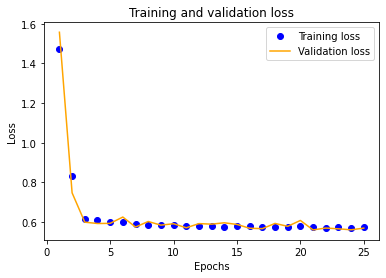

In [51]:
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 
epochs = range(1, len(loss_values) + 1) 
# plot loss against epochs
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

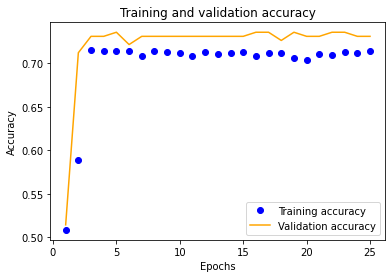

0.7358490824699402

In [52]:
# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot accuracy against epochs
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Print highest validation accuracy (on training set)
np.max(val_acc)

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds = np.round(model.predict(X_test),0)

# confusion matrix
print(confusion_matrix(y_test, preds)) 
# [TN, FP]
# [FN, TP]
print(classification_report(y_test, preds))

[[189   1]
 [ 73   2]]
              precision    recall  f1-score   support

           0       0.72      0.99      0.84       190
           1       0.67      0.03      0.05        75

    accuracy                           0.72       265
   macro avg       0.69      0.51      0.44       265
weighted avg       0.71      0.72      0.61       265

